In [1]:
# Test 127 - Séries temporelles avec statsmodels - Mon code

In [2]:
'''
L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables.
N'hésitez pas à contacter l'équipe DataScientest si vous rencontrez des problèmes sur help@datascientest.com.
L'objet de cet exercice est d'analyser et prédire les valeurs futures d'une série temporelle.
Les packages utilisés seront numpy, pandas, matplotlib, statstools et ses sous-packages.
Une brève description du jeu de données est présentée ci-après.

'''
print('')

In [3]:
'''
Jeu de données 

Cet exercice porte sur la fréquentation du réseau de transports en commun de Portland. 
Nous disposons de valeurs mensuelles sur une dizaine d'années. L'objectif de l'exercice sera d'analyser ces valeurs 
afin de trouver un modèle SARIMA permettant des prédictions satisfaisantes à l'horizon d'un an.
'''
print('')

In [4]:
'''
•	(a) Charger les bibliothèques pandas, numpy et statsmodels sous les noms pd, np et sm.
•	(b) Charger le package matplolib.pyplot sous le nom plt.

'''
print('')

In [5]:
import pandas as pd
import numpy as np
import statsmodels as sm

import matplotlib.pyplot as plt

In [6]:
'''
•	(c) Charger les données contenues dans le fichier portland_v2.csv.
'''
print('')

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data = pd.read_csv('portland_v2home.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
data.head(5)

Unnamed:0
1973-01-01    64800
1973-02-01    64600
1973-03-01    63900
1973-04-01    65400
1973-05-01    63000
Name: riders, dtype: int64

In [8]:
'''
•	(d) Attention au format de l'index et au type des données avant de passer aux questions suivantes.
'''
print('')

In [9]:
print(data.index)
# format datatime de l'index. On a bien chargé les données pour se placer dans le cadre d'une série temporelle.

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '1980-09-01', '1980-10-01', '1980-11-01', '1980-12-01',
               '1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01'],
              dtype='datetime64[ns]', name='Unnamed:0', length=102, freq=None)


In [10]:
'''
•	(e) Afficher une description statistique des valeurs de la série.
'''
print('')

count       102.000000
mean     109140.196078
std       27075.648552
min       61300.000000
25%       85950.000000
50%      112700.000000
75%      129575.000000
max      155800.000000
Name: riders, dtype: float64
La Série temporelle comporte 102 relevés, à raison de 1 relevé par mois.
Graphiquement cela donne :


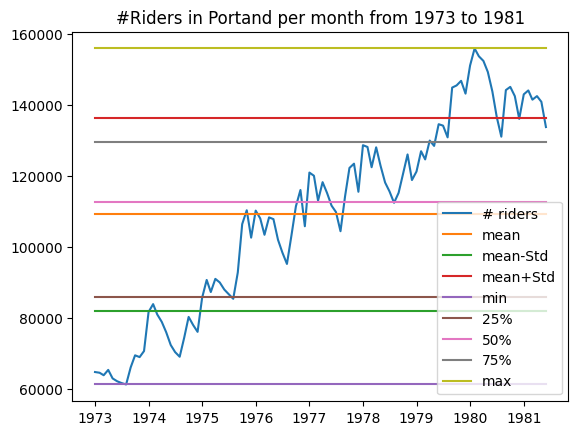



Nous constatons que :
-1) la moyenne n'est pas constante,
-2) la variance n'est pas constante.
Cette série temporelle n'est pas stationnaire.


Nous allons chercher à rendre stationnaire cette série temporelle.
Pour celà, nous devrons également vérifier le troisième critère permettant d'indiquer qu'une série est stationnaire:
-3) L'autocorrélation qui doit décroitre rapidement vers 0.


In [11]:
print(data.describe())
print("La Série temporelle comporte 102 relevés, à raison de 1 relevé par mois.")
print("Graphiquement cela donne :")
plt.plot(data.index[:],data.values[:],label='# riders')
plt.plot([data.index.min(),data.index.max()],[109140.196078,109140.196078],label='mean')
plt.plot([data.index.min(),data.index.max()],[109140.196078-27075.648552,109140.196078-27075.648552],label='mean-Std')
plt.plot([data.index.min(),data.index.max()],[109140.196078+27075.648552,109140.196078+27075.648552],label='mean+Std')
plt.plot([data.index.min(),data.index.max()],[61300.000000,61300.000000],label='min')
plt.plot([data.index.min(),data.index.max()],[85950.000000,85950.000000],label='25%')
plt.plot([data.index.min(),data.index.max()],[112700.000000,112700.000000],label='50%')
plt.plot([data.index.min(),data.index.max()],[129575.000000,129575.000000],label='75%')
plt.plot([data.index.min(),data.index.max()],[155800.000000,155800.000000],label='max')
plt.legend(loc ='lower right')
plt.title("#Riders in Portand per month from 1973 to 1981")
plt.show();

print("\n")
print("Nous constatons que :")
print("-1) la moyenne n'est pas constante,")
print("-2) la variance n'est pas constante.")
print("Cette série temporelle n'est pas stationnaire.")
print("\n")
print("Nous allons chercher à rendre stationnaire cette série temporelle.")
print("Pour celà, nous devrons également vérifier le troisième critère permettant d'indiquer qu'une série est stationnaire:")
print("-3) L'autocorrélation qui doit décroitre rapidement vers 0.")

In [12]:
'''
•	(f) Effectuer une décomposition saisonnière à l'aide de statsmodels.
•	(g) Quelle est la période ? Privilégiera-t-on un modèle additif ou multiplicatif ?

'''
print('')

Modèle additif:


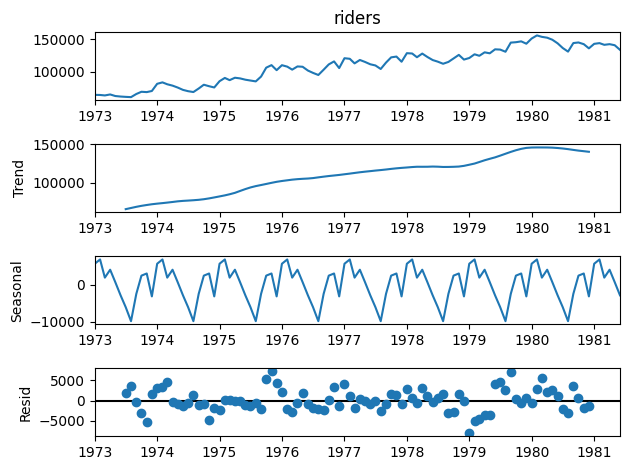



Modèle multiplicatif:


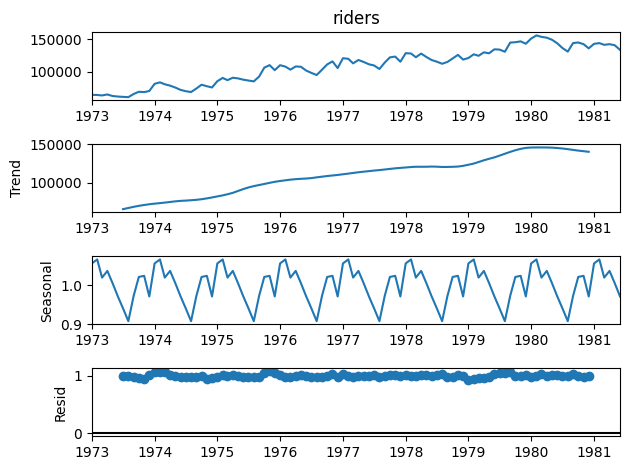

En comparant les deux résidus, il apparaît qu'il faut plutôt privilégier le modèle 'multiplicatif'.


Pour pouvoir tenter une modélisation à partir de cette série temporelle, il faut s'assurer que nous avons
'stationnarisé' les données, c'est à dire :
-1) La moyenne et la variance sont 'constantes',
-2) Il n'y a plus de composante périodique. Ici, nous notons une périodicité de 12 mois (graphique 'seasonal').
-3) L'autocorrélation décroit rapidement vers 0.


************************************************************
*      Pour note : périodicité de longueur 12. K = 12      *
************************************************************


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

print("Modèle additif:")
sd_add = seasonal_decompose(data)

sd_add.plot()

plt.show();

print("\n")
print("Modèle multiplicatif:")

sd_mult = seasonal_decompose(data, model= 'multiplicative')

sd_mult.plot()

plt.show();

print("En comparant les deux résidus, il apparaît qu'il faut plutôt privilégier le modèle 'multiplicatif'.")
print("\n")
print("Pour pouvoir tenter une modélisation à partir de cette série temporelle, il faut s'assurer que nous avons")
print("'stationnarisé' les données, c'est à dire :")
print("-1) La moyenne et la variance sont 'constantes',")
print("-2) Il n'y a plus de composante périodique. Ici, nous notons une périodicité de 12 mois (graphique 'seasonal').")
print("-3) L'autocorrélation décroit rapidement vers 0.")
print("\n")
print("************************************************************")
print("*      Pour note : périodicité de longueur 12. K = 12      *")
print("************************************************************")

In [14]:
'''
•	(h) Afficher la fonction d'autocorrélation de la série.
'''
print('')

Sur la suite, nous travaillons donc sur les données transformées 'log'.


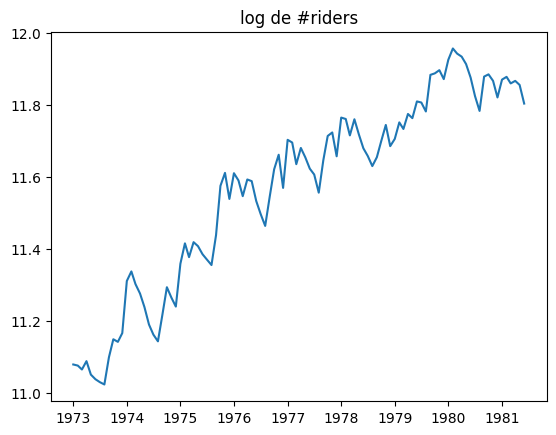

La série en 'log' n'est pas stationnaire.


On affiche maintenant la fonction d'autocorrélation de la Series 'data_log'
L'autocorrélation présente une structure qui n'est pas constante, mais qui décroit lentement.


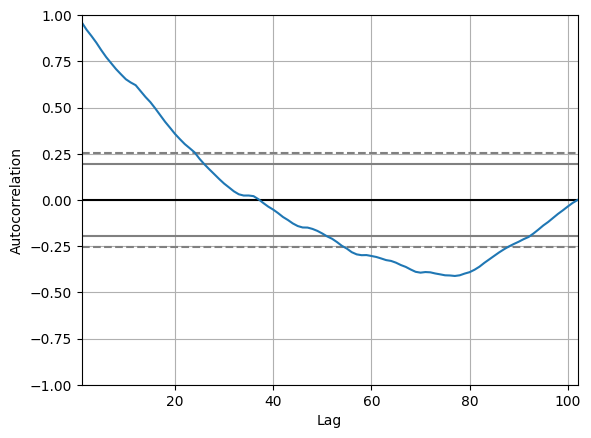

In [15]:
from pandas.plotting import autocorrelation_plot

print("Sur la suite, nous travaillons donc sur les données transformées 'log'.")

# on passe en log pour obtenir des variations saisonnières d'amplitude quasi constantes:
data_log = np.log(data)

plt.plot(data_log)
# plt.plot(data)
plt.title("log de #riders")
plt.show();
print("La série en 'log' n'est pas stationnaire.")
print("\n")
print("On affiche maintenant la fonction d'autocorrélation de la Series 'data_log'")
print("L'autocorrélation présente une structure qui n'est pas constante, mais qui décroit lentement.")

autocorrelation_plot(data_log);

In [16]:
'''
•	(i) Effectuer les opérations nécessaires pour estimer les paramètres d et D du modèle SARIMA.
'''
print('')

Détails sur les paramètres du modèle SARIMA:
La modélisation SARIMA requiert de connaitre 7 paramètres que l'on peut écrire sous la forme suivante:
SARIMA(p,d,q)(P,D,Q)k
avec :
p et saisonnalité P : lags sur la Series 'stationnarisée' (nombre de termes d'autoregression AR),
d et saisonnalité D : nombre de différenciations à effectuer pour 'stationnariser' la Series,
q et saisonnalité Q : lag sur les erreurs de prévision (indique le nombre de termes de la moyenne mobile MA)
et k : longueur de la périodicité. Nous avons vu sur les graphiques précédents que k = 12.


Nous allons maintenant tenter de déterminer d et D.
Pour celà nous allons appliquer de manière itérative des différentiations et valider par un test statistique
(test augmenté de Dickey-Fuller) si nous avons atteint la stationnarité.




Affichage d'une première différenciation (donc pour d=1) et de son diagramme d'autocorrélation :


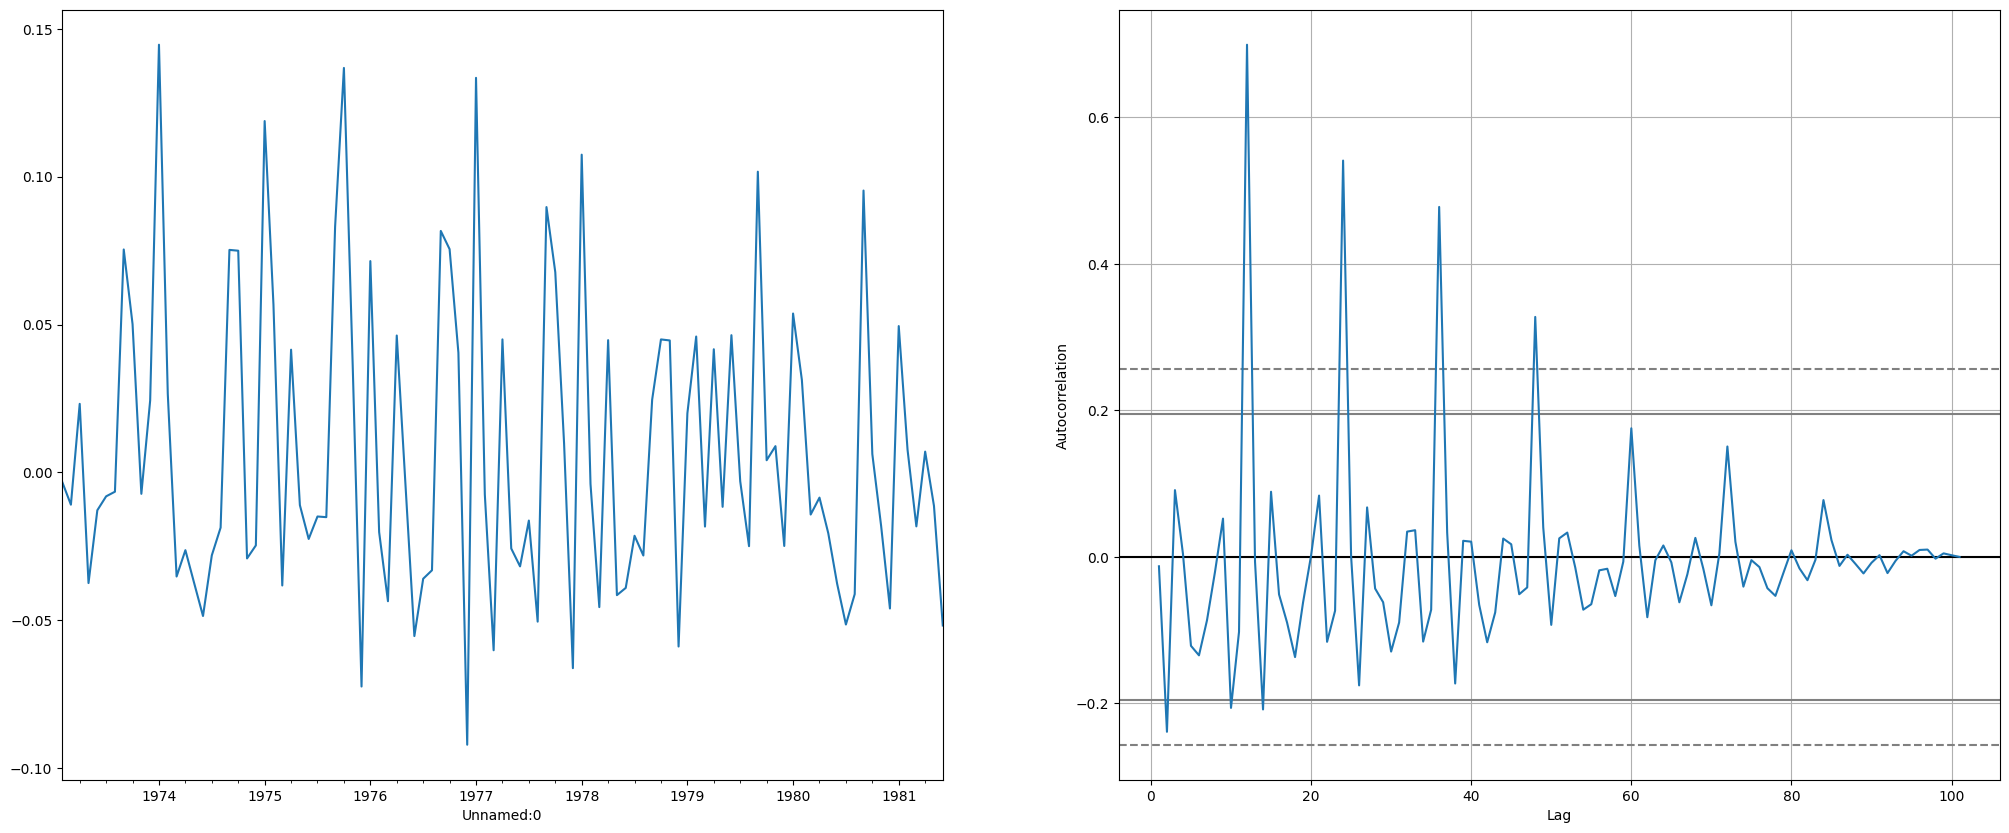



L'autocorrélation tend vers 0, mais on observe toujours des pics importants liés à la saisonnalité.
(pics pour les lags multiples de 12)
Quand on regarde les pics de valeurs pour data_log1, on retrouve également cette périodicité annuelle.




Effectuons une différentiation en saisonnalité sur data_log1 avec décalage de période k = 12
(Ce qui nous donnera donc: D = 1).


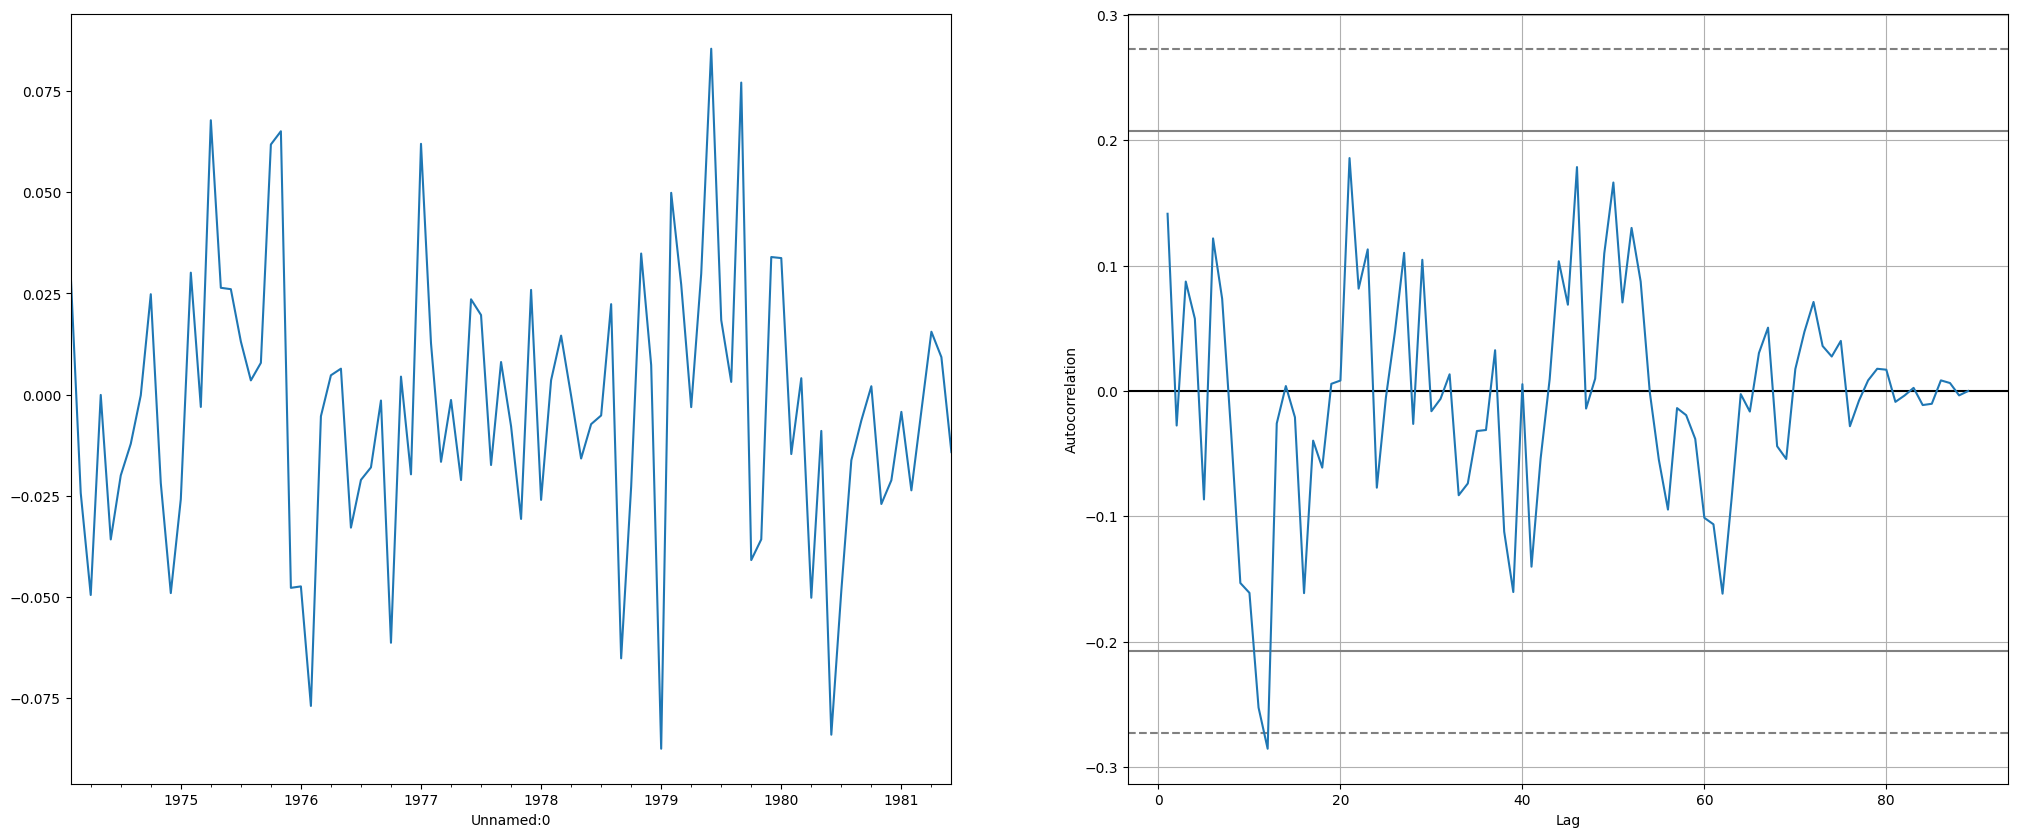

Ces nouveaux résultats nous semblent meilleurs : il est difficile de trouver des patterns sur le graphique de
data_log2 et l'autocorrélation, déjà faible dès les premiers lags devient en deça du seuil de sensibilité après 12.
Appliquons le test augmenté de Dickey-Fuller pour vérifier cette impression :


Pour data_log2, le résultat du test est :
1.4525703195870265e-12
Le résultat est <0.05, nous obtenons une Series stationnaire suite à une différentiation (d=1) puis une
différentiation en saisonnalité de période 12 (D=1).
********************
*  d = 1 et D = 1  *
********************


On vérifie bien les 3 critères de la stationnarité :
Autocorrélation : décroit rapidement vers 0.
Moyenne: -0.0034143562638742526 ~ 0
Variance: 0.03395430378962754 ~ 0


Nous avons identifié 3 des 7 paramètres de la modélisation SARIMA


Les paramètres restants reposent sur l'analyse des diagrammes d'autocorrélation et d'autocorréation partielle.
Cette seconde partie n'est pas visuellement facile à effec

In [17]:
print("Détails sur les paramètres du modèle SARIMA:")
print("La modélisation SARIMA requiert de connaitre 7 paramètres que l'on peut écrire sous la forme suivante:")
print("SARIMA(p,d,q)(P,D,Q)k")
print("avec :")
print("p et saisonnalité P : lags sur la Series 'stationnarisée' (nombre de termes d'autoregression AR),")
print("d et saisonnalité D : nombre de différenciations à effectuer pour 'stationnariser' la Series,")
print("q et saisonnalité Q : lag sur les erreurs de prévision (indique le nombre de termes de la moyenne mobile MA)")
print("et k : longueur de la périodicité. Nous avons vu sur les graphiques précédents que k = 12.")
print("\n")
print("Nous allons maintenant tenter de déterminer d et D.")
print("Pour celà nous allons appliquer de manière itérative des différentiations et valider par un test statistique")
print("(test augmenté de Dickey-Fuller) si nous avons atteint la stationnarité.")
print("\n")
print("\n")
print("Affichage d'une première différenciation (donc pour d=1) et de son diagramme d'autocorrélation :")

data_log1 = data_log.diff().dropna() # première différentiation

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

data_log1.plot(ax = ax1) #Série temporelle différenciée 1 fois

pd.plotting.autocorrelation_plot(data_log1, ax = ax2) # Autocorrélogramme de la série différenciée 1 fois
plt.show();

print("\n")
print("L'autocorrélation tend vers 0, mais on observe toujours des pics importants liés à la saisonnalité.")
print("(pics pour les lags multiples de 12)")
print("Quand on regarde les pics de valeurs pour data_log1, on retrouve également cette périodicité annuelle.")

print("\n")
print("\n")
print("Effectuons une différentiation en saisonnalité sur data_log1 avec décalage de période k = 12")
print("(Ce qui nous donnera donc: D = 1).")

data_log2 = data_log1.diff(periods = 12).dropna()

fig2, (ax3, ax4) = plt.subplots(1,2, figsize=(25,10)) # Création de la figure et des axes

data_log2.plot(ax = ax3) #Série temporelle différenciée deux fois

pd.plotting.autocorrelation_plot(data_log2, ax = ax4) #Autocorrélogramme de la série différenciée deux fois
plt.show();

print("Ces nouveaux résultats nous semblent meilleurs : il est difficile de trouver des patterns sur le graphique de")
print("data_log2 et l'autocorrélation, déjà faible dès les premiers lags devient en deça du seuil de sensibilité après 12.")
print("Appliquons le test augmenté de Dickey-Fuller pour vérifier cette impression :")
print("\n")

from statsmodels.tsa.stattools import adfuller
_,pvalue2,_,_,_,_ = adfuller(data_log2)

print("Pour data_log2, le résultat du test est :")
print(pvalue2) # si pvalue <0.05 alors on peut rejeter l'hypothèse que la série n'est pas stationnaire.
print("Le résultat est <0.05, nous obtenons une Series stationnaire suite à une différentiation (d=1) puis une")
print("différentiation en saisonnalité de période 12 (D=1).")
print("********************")
print("*  d = 1 et D = 1  *")
print("********************")
print("\n")
print("On vérifie bien les 3 critères de la stationnarité :")
print("Autocorrélation : décroit rapidement vers 0.")
print("Moyenne:",data_log2.mean(),"~ 0")
print("Variance:",data_log2.std(),"~ 0")
print("\n")
print("Nous avons identifié 3 des 7 paramètres de la modélisation SARIMA")
print("\n")
print("Les paramètres restants reposent sur l'analyse des diagrammes d'autocorrélation et d'autocorréation partielle.")
print("Cette seconde partie n'est pas visuellement facile à effectuer et il sera toujours possible par la suite")
print("de prendre d'autres valeurs si les paramètres trouvés ne donnent pas des résultats satisfaisants sur nos simulations.")

In [18]:
'''
•	(j) À l'aide de la fonction ACF, estimer les autres paramètres probables du modele SARIMA.
'''
print('')

Nous allons maintenant rechercher la valeur des paramètres (p,q) et (P,Q) de SARIMA:


Nous affichons sur 36 lags les fonctions d'autocorrelation et d'autocorrélation partielle.


Principes d'analyses des deux graphiques :
Le graphique ACF fait référence à la partie MA(q) ou MA(Q)
alors que le graphique PACF se rapporte à la partie AR(p) ou AR(P).
La zone bleue indique la zone de coupure (non significativité, proche de zéro).
La corrélation pour le lag=0 vaut 1 et correspond à la corrélation de la courbe avec elle-même.
On ne prendra pas en compte cette valeur.




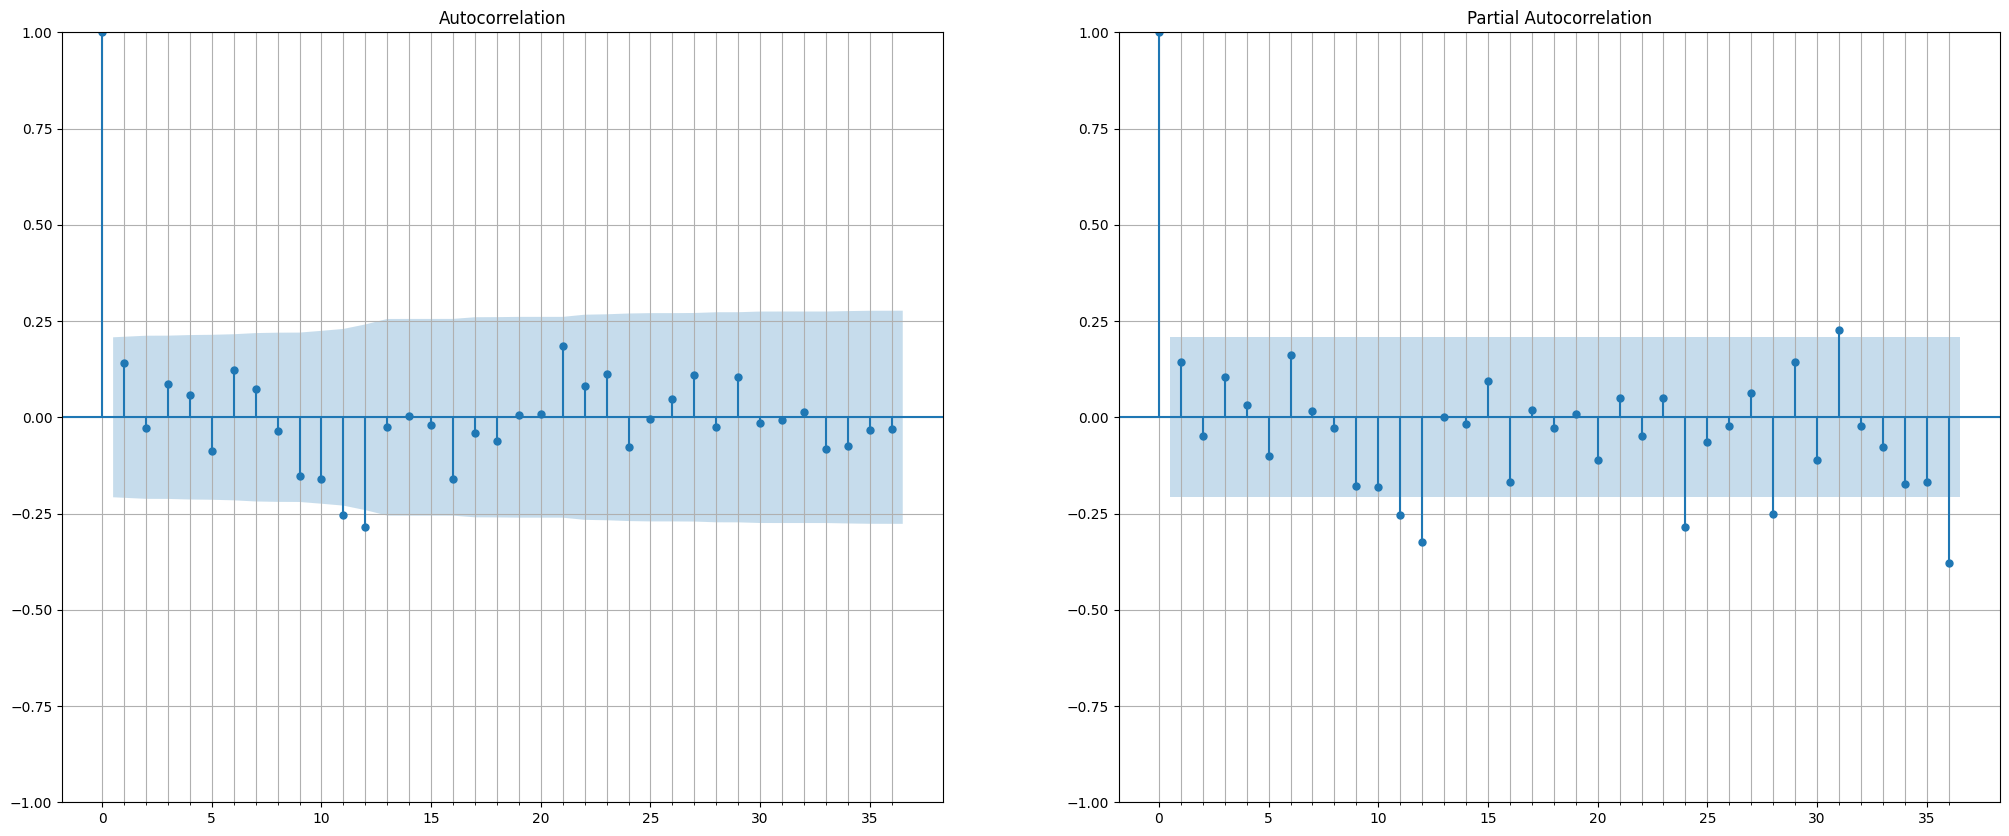

Aucun modèle ne semble s'imposer : On ne retrouve pas les patterns permettant de décider facilement :
- On a bien arret de ACF après l'ordre Q=q=1 mais PACF ne semble pas tendre vers 0.
On part donc sur plusieurs modèles simples obtenus en combinant les possibilités : 


Pour la partie saisonnalité, seuls les lag 12,24,et 36 sont pris en compte.
Les lag significatifs sont les suivants :
ACF, lag=12 ==> Q=0 ou Q=1
PACF, lag = 12, 24 (juste au dessus du seuil de significativité) et 36 ==> P=0,1,2 ou 3


Pour la partie hors saisonnalité, on ne prend pas en compte les lag 12, 24 et 36.
ACF, lag = 11 ==> q=0,1
PACF, lag= 11, 28 et 31 ==> p=0,1,2 ou 3


Nous choisissons pour commencer un modèle MA(1) et MA saisonnalité(1), donc p=0, q=1, P=0, Q=1
Nous ferons donc notre premier modèle avec :
SARIMA(0,1,1)(0,1,1)12


In [19]:
print("Nous allons maintenant rechercher la valeur des paramètres (p,q) et (P,Q) de SARIMA:")
print("\n")
print("Nous affichons sur 36 lags les fonctions d'autocorrelation et d'autocorrélation partielle.")

print("\n")
print("Principes d'analyses des deux graphiques :")
print("Le graphique ACF fait référence à la partie MA(q) ou MA(Q)")
print("alors que le graphique PACF se rapporte à la partie AR(p) ou AR(P).")
print("La zone bleue indique la zone de coupure (non significativité, proche de zéro).")
print("La corrélation pour le lag=0 vaut 1 et correspond à la corrélation de la courbe avec elle-même.")
print("On ne prendra pas en compte cette valeur.")
print("\n")

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig3, (ax5,ax6) = plt.subplots(1,2, figsize=(25,10))

ax5.grid(which = 'both')
ax5.set_xticks(np.arange(0,37,1),minor = True)
plot_acf(data_log2, lags = 36, ax=ax5)

ax6.grid(which = 'both')
ax6.set_xticks(np.arange(0,37,1),minor = True)
plot_pacf(data_log2, lags = 36, ax=ax6)
plt.show();

print("Aucun modèle ne semble s'imposer : On ne retrouve pas les patterns permettant de décider facilement :")
print("- On a bien arret de ACF après l'ordre Q=q=1 mais PACF ne semble pas tendre vers 0.")
print("On part donc sur plusieurs modèles simples obtenus en combinant les possibilités : ")
print("\n")

print("Pour la partie saisonnalité, seuls les lag 12,24,et 36 sont pris en compte.")
print("Les lag significatifs sont les suivants :")
print("ACF, lag=12 ==> Q=0 ou Q=1")
print("PACF, lag = 12, 24 (juste au dessus du seuil de significativité) et 36 ==> P=0,1,2 ou 3")
print("\n")
print("Pour la partie hors saisonnalité, on ne prend pas en compte les lag 12, 24 et 36.")
print("ACF, lag = 11 ==> q=0,1")
print("PACF, lag= 11, 28 et 31 ==> p=0,1,2 ou 3")
print("\n")

print("Nous choisissons pour commencer un modèle MA(1) et MA saisonnalité(1), donc p=0, q=1, P=0, Q=1")
print("Nous ferons donc notre premier modèle avec :")
print("SARIMA(0,1,1)(0,1,1)12")

In [20]:
'''
•	(k) Estimer à l'aide de la fonction SARIMAX le meilleur modèle possible pour cette série.
Il se peut que tous les tests statistiques de normalité et de blancheur ne soient pas satisfaits.
'''
print('')

In [21]:
print("Nous utilisons donc SARIMA(0,1,1)(0,1,1)12.")
print("Si ce modèle n'est pas assez performant, il sera toujours possible de rajouter d'autres termes.")
import statsmodels.api as sm2

sarima_unfitted = sm2.tsa.SARIMAX(endog=data_log, order = (0,1,1),seasonal_order = (0,1,1,12))
sarima = sarima_unfitted.fit()

print(sarima.summary());
print("\n")
print("Analyse du résumé:")
print("La colonne P>|z| correspond à la p-value des divers paramètres.")
print("Ceci nous indique que le paramètre pour MA est bien au dessus de 5% mais que MA saisonnalité est adapté.")
print("Nous pouvons considérer le terme q=1 comme non significatif et le supprimer.")
print("\n")
print("Les modèles avec q=1 sont donc à éliminer. On prend alors p=P=0, q=0 et Q=1")
print("Nous allons maintenant simuler un second modèle : SARIMA(0,1,0)(0,1,1)12")

sarima_unfitted2 = sm2.tsa.SARIMAX(endog=data_log, order = (0,1,0),seasonal_order = (0,1,1,12))
sarima2 = sarima_unfitted2.fit()

print(sarima2.summary());
print("\n")
print("Cette fois-ci, la p-value est très faible. Nous avons choisi des paramètres significatifs.")
print("Regardons maintenant les valeurs pour le résidu. La valeur 'Prob(Q)' du résumé correspond au test de Ljung-Box.")
print("La p-valeur de ce test est de 0.73, donc le bruit est bien un bruit blanc.")
print("Concernant la distribution du résidu, la valeur 'Prob(JB)' du résumé correspond au test de Jarque-Bera")
print("La p-valeur de ce test est de 0.72, donc le résidu suit une distribuition normale.")
print("\n")
print("Le modèle SARIMA(1,1,0)(1,1,0)12 est satisfaisant.")
print("\n")
print("En testant quelques autres modèles avec p ou q non nul, j'obtiens une p-value au dessus de 5%. Je garde donc ce")
print("modèle.")

Nous utilisons donc SARIMA(0,1,1)(0,1,1)12.
Si ce modèle n'est pas assez performant, il sera toujours possible de rajouter d'autres termes.


C:\Users\plebert1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\plebert1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\plebert1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\plebert1\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             riders   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 180.986
Date:                            Tue, 11 Apr 2023   AIC                           -355.972
Time:                                    06:50:14   BIC                           -348.506
Sample:                                01-01-1973   HQIC                          -352.963
                                     - 06-01-1981                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0823      0.093      0.886      0.376      -0.100       0.264
ma.S.L12      -0.4810      0.119   

In [22]:
'''
•	(l) Effectuer une prédiction pour les 12 mois suivant la dernière mesure disponible.
'''
print('')

In [23]:
import datetime
print(data.index.max())
print(len(data))

y_pred = np.exp(sarima2.predict(102,113)) # prediction réalisée sur les valeur data. 
#==> pour retrouver data, on prend l'exponentielle des valeurs de data_log
print(y_pred)

1981-06-01 00:00:00
102
1981-07-01    129527.587765
1981-08-01    125083.385727
1981-09-01    136412.056342
1981-10-01    139136.273148
1981-11-01    139285.203966
1981-12-01    133170.522784
1982-01-01    140671.148885
1982-02-01    143110.063144
1982-03-01    140145.836924
1982-04-01    141829.032365
1982-05-01    139561.213075
1982-06-01    134885.768655
Freq: MS, Name: predicted_mean, dtype: float64


In [24]:
'''
Les données présentes dans le fichier portland_8182.csv contiennent les valeurs réelles sur ces 12 mois.

•	(m) Lire les données présentes dans ce fichier.
'''
print('')

In [25]:
y = pd.read_csv('portland_8182home.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
y.head(12)

Unnamed: 0
1981-07-01    125800
1981-08-01    121400
1981-09-01    132600
1981-10-01    141700
1981-11-01    141700
1981-12-01    132900
1982-01-01    146100
1982-02-01    142500
1982-03-01    141900
1982-04-01    143200
1982-05-01    139400
1982-06-01    132700
Name: riders, dtype: int64

In [26]:
'''
•	(n) Faire une représentation graphique des valeurs prédites et des valeurs réelles de la série.
'''
print('')

1981-06-01 00:00:00
102


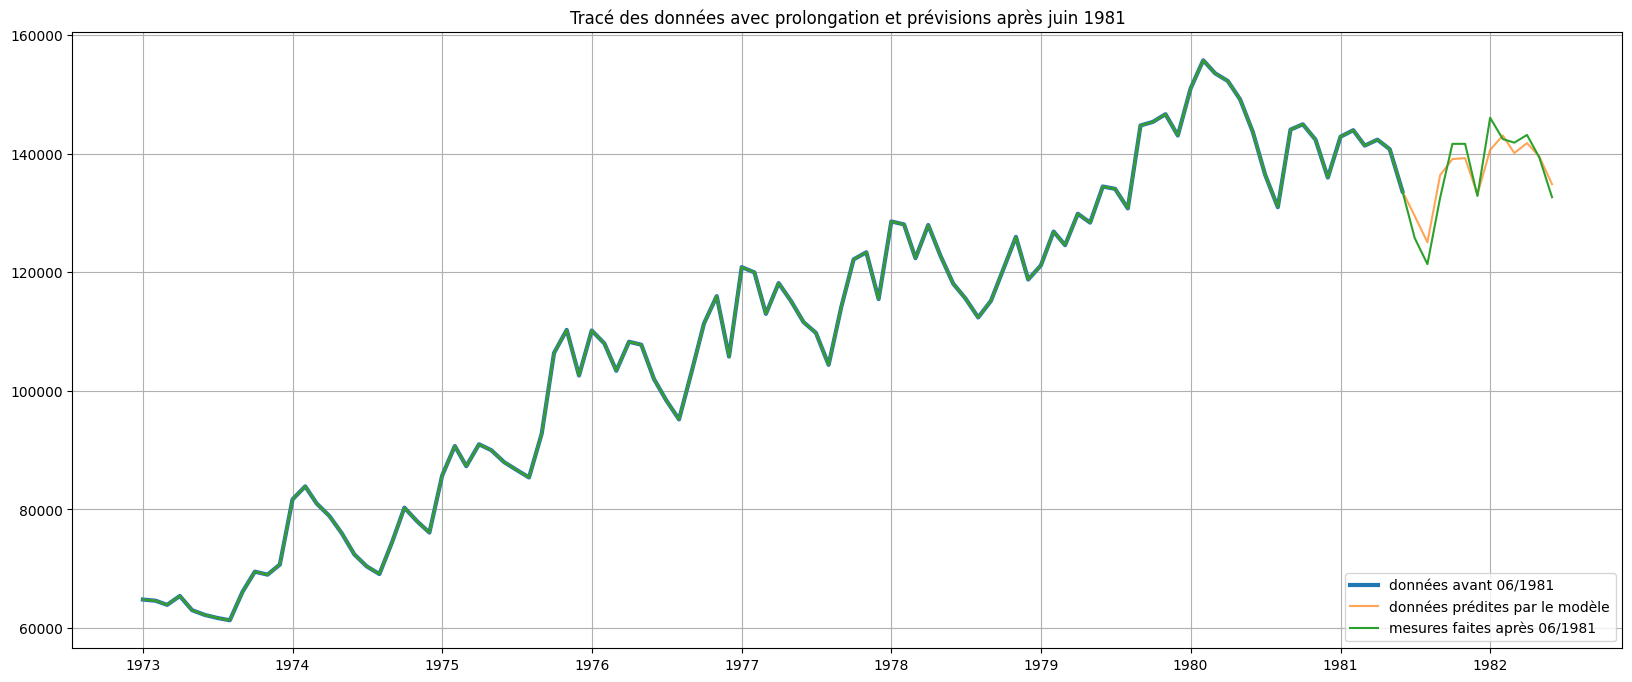

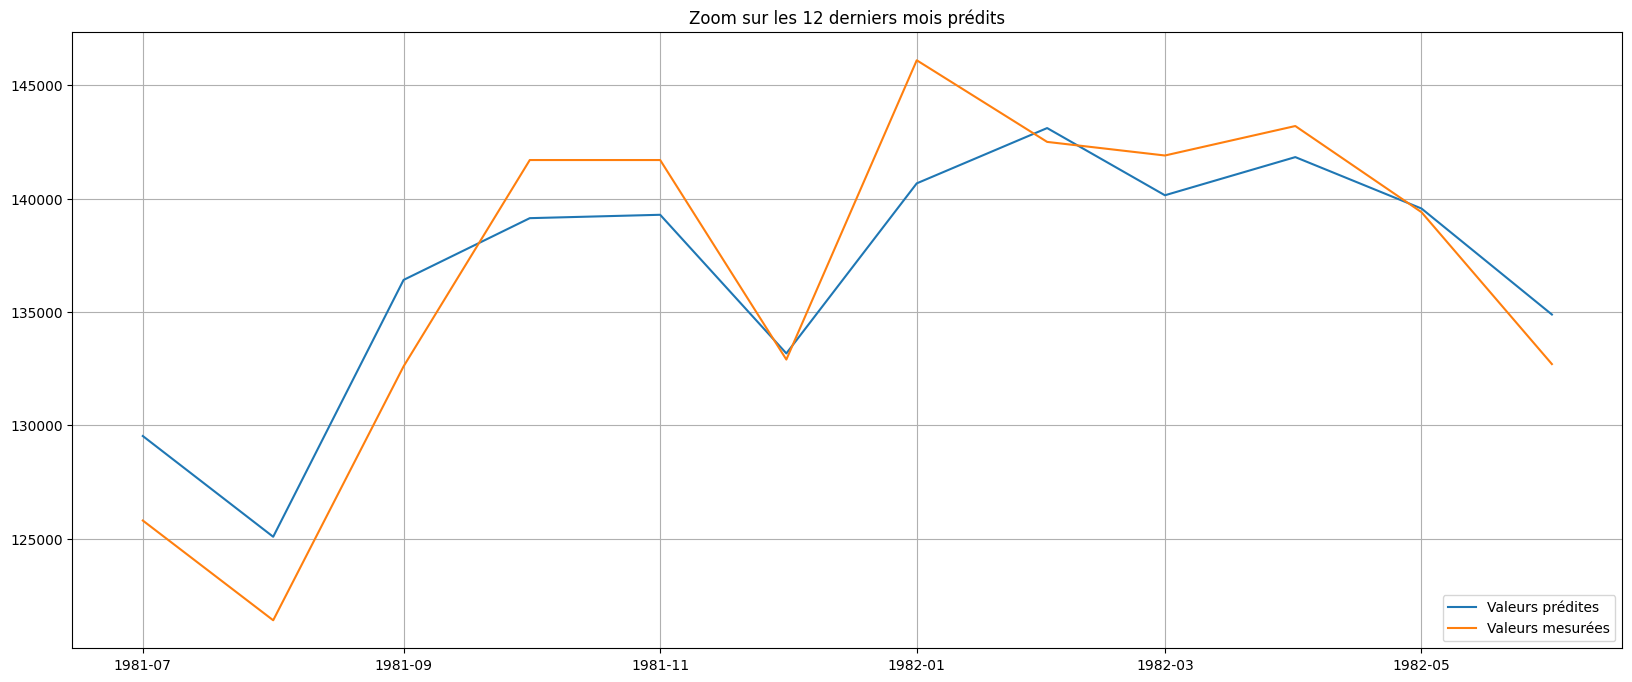

In [27]:
import datetime
print(data.index.max())
print(len(data))

fig1 = plt.figure(figsize=(20,8))

plt.plot(data,label="données avant 06/1981",linewidth=3)
plt.plot(pd.concat([data,y_pred]),label="données prédites par le modèle",alpha=0.7)
plt.plot(pd.concat([data,y]),label="mesures faites après 06/1981")

#plt.axvline(x= datetime.date(1981,6,1), color='red'); # Ajout de la ligne verticale
plt.title("Tracé des données avec prolongation et prévisions après juin 1981")
plt.legend(loc='lower right')
plt.grid()
plt.show();


fig2 = plt.figure(figsize=(20,8))
plt.title("Zoom sur les 12 derniers mois prédits")
plt.plot(y_pred,label="Valeurs prédites") # affichage des résultats
plt.plot(y,label="Valeurs mesurées")
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [28]:
'''
On définit l'erreur moyenne relative.

voir : erreur moyenne relative.jpg

Elle permet de savoir si la prédiction surévalue ou sous-évalue les valeurs réelles de la série.
•	(o) Calculer l'erreur moyenne relative de la prédiction.
•	(p) Que concluez-vous ? Sous-évaluation ou sur-évaluation des valeurs ?

'''
print('')

In [30]:
emr = (y_pred-y).mean()/y.mean() # valeur signée, il faut faire attention à la définition que l'on choisit.
print("Erreur moyenne relative = ",emr)
print("L'erreur moyenne relative est très faible. Les valeurs prédites sont en moyenne très légèrement sur-évaluées,")
print("erm >0, donc les valeurs des prédictions sont légèrement au dessus des valeurs réelles (en moyenne).")

Erreur moyenne relative =  0.0005591648573303839
L'erreur moyenne relative est très faible. Les valeurs prédites sont en moyenne très légèrement sur-évaluées,
erm >0, donc les valeurs des prédictions sont légèrement au dessus des valeurs réelles (en moyenne).


In [ ]:
'''
-1) ACF et PACF pour déterminer p, q, P et Q : j'ai regardé de nombreuses vidéos et lu des commentaires, 
mais on se retrouve toujours avec des configurations qui ne sont pas standards. Au final, on ne peut pas se fier 
à 100% à ces critères et il faut quand même tenter d'autres modèles, même si le premier modèle testé convient 
(p-value <5% pour valider la significativité du paramètre). On devra toujours vérifier un bon score pour le test 
de Ljung-Box et le test de Jarque-Bera.
-2) J'ai été vraiment très agréablement étonné de la proximité des prédictions par rapport aux valeurs réelles.
-3) Concernant l'erm, on garde également une 'erm' très faible pour l'autre modèle testé., mais avec une sous-évaluation.
'''